In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('./Data_Train.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.shape

(10683, 11)

In [7]:
df.isna().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [8]:
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

In [13]:
data = df.copy()

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
def to_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [16]:
for column in ['Dep_Time','Arrival_Time','Date_of_Journey']:
    to_datetime(column)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [18]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-04-29 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-29 05:50:00,2024-04-29 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-04-29 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-04-29 18:05:00,2024-04-29 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-04-29 16:50:00,2024-04-29 21:35:00,4h 45m,1 stop,No info,13302


In [19]:
def extract_hour_min(df,col):
    df[col+' hour'] = df[col].dt.hour
    df[col+' minute'] = df[col].dt.minute
    return df.head()

In [20]:
extract_hour_min(data,'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Time hour,Arrival_Time minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-04-29 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-29 05:50:00,2024-04-29 13:15:00,7h 25m,2 stops,No info,7662,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-04-29 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-04-29 18:05:00,2024-04-29 23:30:00,5h 25m,1 stop,No info,6218,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-04-29 16:50:00,2024-04-29 21:35:00,4h 45m,1 stop,No info,13302,21,35


In [21]:
extract_hour_min(data,'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Time hour,Arrival_Time minute,Dep_Time hour,Dep_Time minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-04-29 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-29 05:50:00,2024-04-29 13:15:00,7h 25m,2 stops,No info,7662,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-04-29 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-04-29 18:05:00,2024-04-29 23:30:00,5h 25m,1 stop,No info,6218,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-04-29 16:50:00,2024-04-29 21:35:00,4h 45m,1 stop,No info,13302,21,35,16,50


In [22]:
cols_to_drop = ['Arrival_Time','Dep_Time']
data.drop(cols_to_drop,axis=1,inplace = True)

In [23]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_Time hour,Arrival_Time minute,Dep_Time hour,Dep_Time minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,21,35,16,50


In [24]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [25]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [26]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return 'Early Morning'
    elif(x>8) and (x<=12):
        return 'Morning'
    elif(x>12) and (x<=16):
        return 'Afternoon'
    elif(x>16) and (x<=20):
        return 'Evening'
    elif(x>20) and (x<=24):
        return 'Night'
    else:
        return 'Late Night'

<Axes: xlabel='Dep_Time hour'>

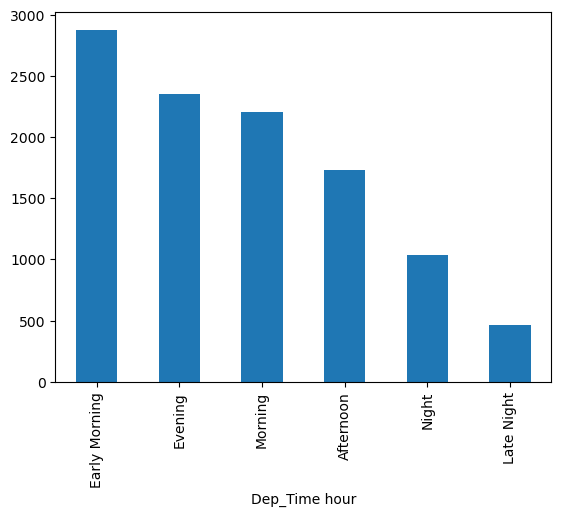

In [27]:
data['Dep_Time hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [28]:
# !pip install chart_studio
# !pip install cufflinks

In [29]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [30]:
data['Dep_Time hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

In [31]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [32]:
def process_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    return x

In [33]:
data['Duration'] = data['Duration'].apply(process_duration)

In [34]:
data['Duration_hours'] = data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))
data['Duration_mins'] = data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [35]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_Time hour,Arrival_Time minute,Dep_Time hour,Dep_Time minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,1,10,22,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,13,15,5,50,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,4,25,9,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,23,30,18,5,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,21,35,16,50,4,45


In [36]:
data['Duration_total_mins'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [37]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_Time hour,Arrival_Time minute,Dep_Time hour,Dep_Time minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,1,10,22,20,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,13,15,5,50,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,4,25,9,25,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,23,30,18,5,5,25,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,21,35,16,50,4,45,285


<Axes: xlabel='Duration_total_mins', ylabel='Price'>

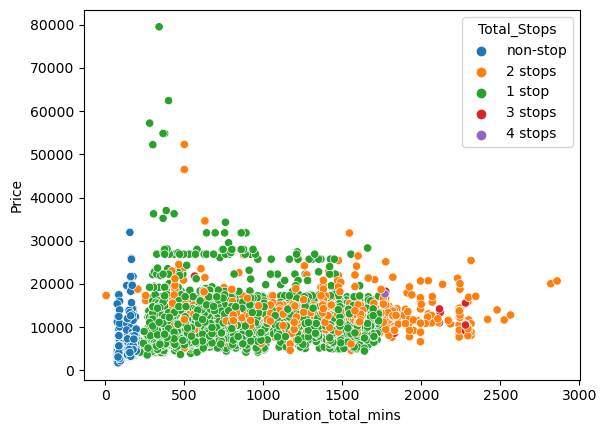

In [38]:
sns.scatterplot(x='Duration_total_mins',y='Price',data=data,hue='Total_Stops')

In [39]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

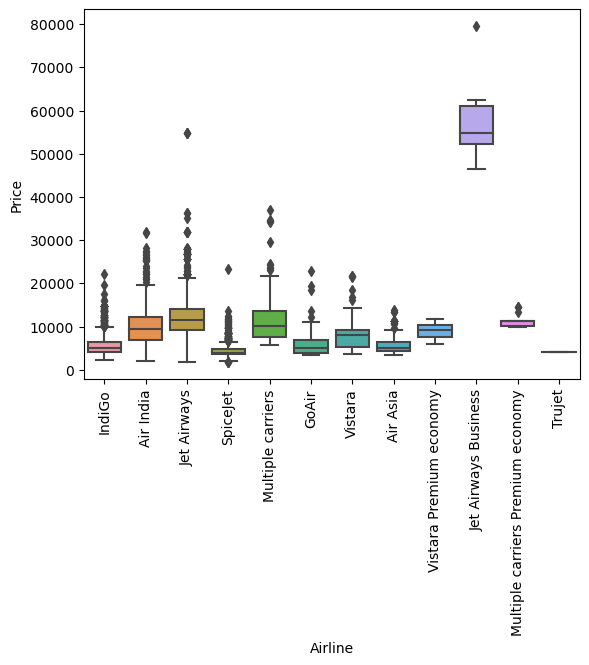

In [40]:
sns.boxplot(y='Price', x = 'Airline',data = data)
plt.xticks(rotation='vertical')

In [41]:
cat_col = [column for column in data.columns if data[column].dtype == 'object']

In [42]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [43]:
num_col = [column for column in data.columns if data[column].dtype != 'object']

In [44]:
num_col

['Date_of_Journey',
 'Price',
 'Arrival_Time hour',
 'Arrival_Time minute',
 'Dep_Time hour',
 'Dep_Time minute',
 'Duration_hours',
 'Duration_mins',
 'Duration_total_mins']

In [45]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [48]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x: 1 if x == sub_category else 0)

In [49]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_Time hour,...,Dep_Time hour,Dep_Time minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,1,...,22,20,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,13,...,5,50,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,4,...,9,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,23,...,18,5,5,25,325,0,1,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,21,...,16,50,4,45,285,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,22,...,19,55,2,30,150,0,1,0,0,0
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,23,...,20,45,2,35,155,0,1,0,0,0
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,11,...,8,20,3,0,180,1,0,0,0,0
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,14,...,11,30,2,40,160,1,0,0,0,0


In [50]:
data['Airline'].nunique()

12

In [52]:
airlines = data.groupby(by='Airline')['Price'].mean().sort_values().index

In [53]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [55]:
dict_airlines = {key:index for index,key in enumerate(airlines,0)}

In [57]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [58]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [59]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [60]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [61]:
dest = data.groupby(by='Destination')['Price'].mean().sort_values().index

In [62]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [63]:
dict_dest = {key:index for index,key in enumerate(dest,0)}

In [64]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [65]:
data['Destination'] = data['Destination'].map(dict_dest)

In [66]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_Time hour,...,Dep_Time hour,Dep_Time minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,1,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,13,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,4,...,9,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,23,...,18,5,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,21,...,16,50,4,45,285,1,0,0,0,0


In [67]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [68]:
stops = { 'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4 }

In [69]:
data['Total_Stops'] = data['Total_Stops'].map(stops)

In [70]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [71]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [72]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Arrival_Time hour', 'Arrival_Time minute', 'Dep_Time hour',
       'Dep_Time minute', 'Duration_hours', 'Duration_mins',
       'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [73]:
data.drop(columns=['Date_of_Journey','Additional_Info','Duration_total_mins','Source'],axis = 1, inplace=True)

In [74]:
data.drop(columns=['Route'],axis=1,inplace=True)

In [75]:
data.head()

,Airline,Destination,Duration,Total_Stops,Price,Arrival_Time hour,Arrival_Time minute,Dep_Time hour,Dep_Time minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,1,10,22,20,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,13,15,5,50,7,25,0,1,0,0,0
2,10,4,19h 0m,2,13882,4,25,9,25,19,0,0,0,1,0,0
3,3,3,5h 25m,1,6218,23,30,18,5,5,25,0,1,0,0,0
4,3,2,4h 45m,1,13302,21,35,16,50,4,45,1,0,0,0,0


In [76]:
data.drop(columns=['Duration'],axis=1,inplace=True)

In [77]:
data.head()

,Airline,Destination,Total_Stops,Price,Arrival_Time hour,Arrival_Time minute,Dep_Time hour,Dep_Time minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,7662,13,15,5,50,7,25,0,1,0,0,0
2,10,4,2,13882,4,25,9,25,19,0,0,0,1,0,0
3,3,3,1,6218,23,30,18,5,5,25,0,1,0,0,0
4,3,2,1,13302,21,35,16,50,4,45,1,0,0,0,0


In [86]:
def plot(df,col):
    fig , (ax1,ax2,ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2,orient='h')
    sns.distplot(df[col],ax=ax3,kde=False)

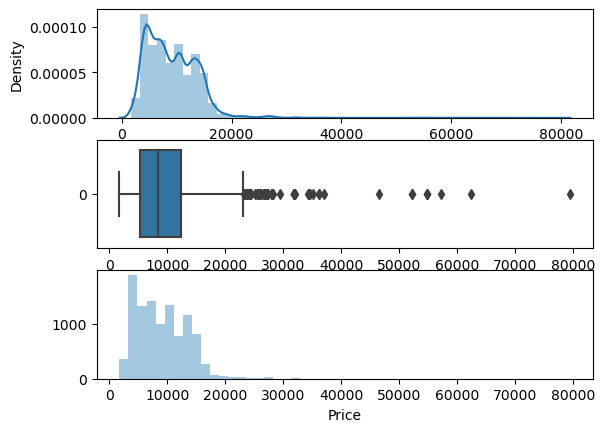

In [87]:
plot(data,'Price')

In [88]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3-q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [90]:
print([price for price in data.Price if price > maximum or price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [94]:
data['Price'] = np.where(data['Price']>=maximum,data['Price'].median(),data['Price'])

In [96]:
data['Price'] = np.where(data['Price']<=minimum,data['Price'].median(),data['Price'])

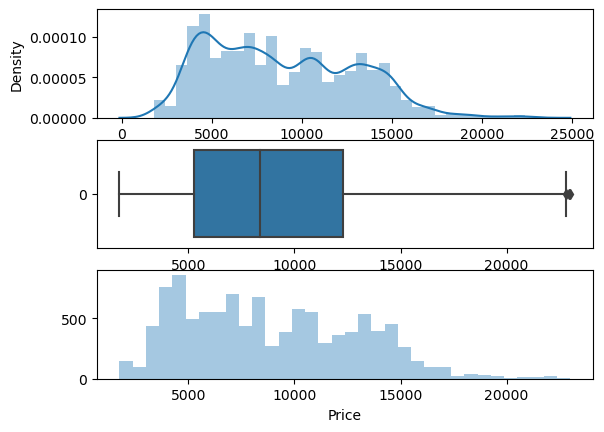

In [97]:
plot(data,'Price')

In [99]:
X = data.drop(['Price'],axis=1)
y = data['Price']

In [100]:
from sklearn.feature_selection import mutual_info_regression

In [101]:
imp = mutual_info_regression(X,y)

In [102]:
imp

array([0.96581427, 0.99845279, 0.79332959, 0.41271392, 0.34406064,
       0.33663706, 0.25107985, 0.47047944, 0.34132553, 0.38589982,
       0.46418499, 0.51919474, 0.13542315, 0.19836677])

In [105]:
imp_df = pd.DataFrame(imp,index=X.columns)

In [108]:
imp_df.columns = ['importance']

In [109]:
imp_df.sort_values(by='importance',ascending=False)

,importance
Destination,0.998453
Airline,0.965814
Total_Stops,0.793330
Source_Delhi,0.519195
Duration_hours,0.470479
Source_Kolkata,0.464185
Arrival_Time hour,0.412714
Source_Banglore,0.385900
Arrival_Time minute,0.344061
Duration_mins,0.341326


In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
ml_model = RandomForestRegressor()

In [114]:
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [115]:
y_pred = ml_model.predict(X_test)

In [116]:
y_pred

array([16703.53158992,  5449.95290044,  8455.13526141, ...,
        3797.28297403,  7630.76286652,  6759.59971136])

In [117]:
from sklearn import metrics

In [118]:
metrics.r2_score(y_test,y_pred)

0.6661892582215421

In [121]:
def mape(y_true,y_pred):
   y_true , y_pred =  np.array(y_true),np.array(y_pred)
   return np.mean(np.abs((y_true-y_pred)/y_true)) * 100

In [122]:
mape(y_test,y_pred)

17.519751964695438

In [123]:
def predict(ml_model):
    model = ml_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_test)
    print('Predictions are: {}'.format(y_pred))
    print('\n')
    r2_score = metrics.r2_score(y_test,y_pred)
    print('R2 score: {}'.format(r2_score))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test,y_pred)))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test,y_pred)))
    print('RMSE score: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
    print('MAPE: {}'.format(mape(y_test,y_pred)))
    sns.distplot(y_test-y_pred)

Training Score : 0.7984098655574811
Predictions are: [16627.26023397  5407.85356755  8457.60687821 ...  3798.69231818
  7505.15355739  6760.79680998]


R2 score: 0.6685873242517475
MAE: 1516.1353369383503
MSE: 5379681.782215934
RMSE score: 2319.414103220021
MAPE: 17.47229046380282


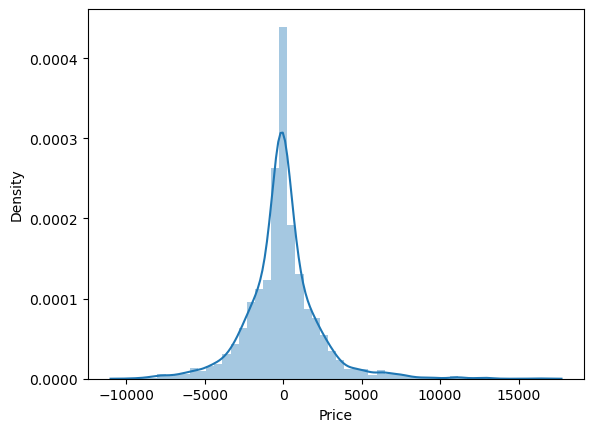

In [124]:
predict(RandomForestRegressor())

In [125]:
from sklearn.tree import DecisionTreeRegressor

Training Score : 0.8036571024224438
Predictions are: [16663.44444444  5457.08333333  8444.57142857 ...  3790.66666667
  7551.          6758.11111111]


R2 score: 0.6198781526975685
MAE: 1578.4153650604744
MSE: 6170357.160715633
RMSE score: 2484.0203623794296
MAPE: 18.13252914854343


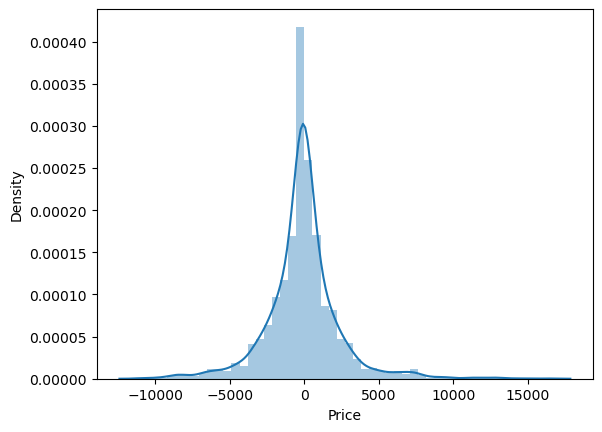

In [126]:
predict(DecisionTreeRegressor())

In [127]:
from sklearn.model_selection import RandomizedSearchCV

In [128]:
reg_rf = RandomForestRegressor()

In [129]:
np.linspace(start=100,stop=1200,num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [130]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=6)]

max_features = ['auto','sqrt']

max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split = [5,10,15,100]

In [132]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [133]:
rf_random = RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,n_jobs=-1,verbose=2)

In [134]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [136]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 13}

In [137]:
rf_random.best_score_

0.684674750675763